In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts

In [41]:
# Make a reference to the csv file path
csv_path = "Resources/AB_NYC_2019.csv"

# Import the USP_business_map.csv file as a DataFrame
df = pd.read_csv(csv_path, encoding="utf-8")
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [42]:
# List of all columns within the DataFrame
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [43]:
# Get neighbourhood_group data counts
neighbourhood_group_data = df["neighbourhood_group"].value_counts()
neighbourhood_group_data

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [44]:
# Get neighbourhood data counts
neighbourhood_data = df["neighbourhood"].value_counts()
neighbourhood_data

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
New Dorp                 1
Rossville                1
Richmondtown             1
Willowbrook              1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64

In [47]:
# Get total neighbourhood_group data counts
bnb_data = neighbourhood_group_data.add(neighbourhood_data, fill_value=0)  # join neighbourhood_group and neighbourhood data
bnb_data = bnb_data.sort_values(ascending=False)        # sort values
bnb_data = bnb_data.astype(int)                   # cast from float to int
bnb_data

Manhattan             21661
Brooklyn              20104
Queens                 5666
Williamsburg           3920
Bedford-Stuyvesant     3714
                      ...  
Richmondtown              1
Rossville                 1
Willowbrook               1
Woodrow                   1
New Dorp                  1
Length: 226, dtype: int32

In [45]:
# Reorganizing the columns using double brackets
df = df[["neighbourhood_group","neighbourhood","room_type","price","minimum_nights","availability_365"]]

df.head(10)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,availability_365
0,Brooklyn,Kensington,Private room,149,1,365
1,Manhattan,Midtown,Entire home/apt,225,1,355
2,Manhattan,Harlem,Private room,150,3,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,0
5,Manhattan,Murray Hill,Entire home/apt,200,3,129
6,Brooklyn,Bedford-Stuyvesant,Private room,60,45,0
7,Manhattan,Hell's Kitchen,Private room,79,2,220
8,Manhattan,Upper West Side,Private room,79,2,0
9,Manhattan,Chinatown,Entire home/apt,150,1,188


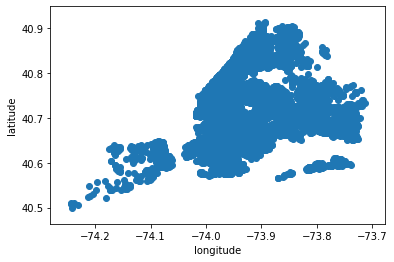

In [11]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib,
# color the data points using the median income of the block.
plt.scatter(airbnb_df['longitude'], airbnb_df['latitude']) #cmap='jet'
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

In [22]:
# Reference multiple columns within a DataFrame
airbnb_df[["neighbourhood_group", "price","minimum_nights","room_type"]].head(10)

,neighbourhood_group,price,minimum_nights,room_type
0,Brooklyn,149,1,Private room
1,Manhattan,225,1,Entire home/apt
2,Manhattan,150,3,Private room
3,Brooklyn,89,1,Entire home/apt
4,Manhattan,80,10,Entire home/apt
5,Manhattan,200,3,Entire home/apt
6,Brooklyn,60,45,Private room
7,Manhattan,79,2,Private room
8,Manhattan,79,2,Private room
9,Manhattan,150,1,Entire home/apt
